In [39]:
import h5py
import numpy as np
import matplotlib.colors as colors
from matplotlib import pyplot as plt
from scipy.spatial import KDTree
import pandas as pd
from astropy.constants import G
import astropy.units as u
import matplotlib
from glob import glob
import pandas as pd
import matplotlib.patches as mpatches

In [40]:
with h5py.File("/scratch3/03532/mgrudic/STARFORGE_RT/STARFORGE_v1.2/M2e4_R10/M2e4_R10_Z1_S0_A2_B0.1_I1_Res271_n2_sol0.5_42/output/dustemission/snapshot_3000.dustemission.hdf5") as A:
    X = A["X_pc"][:]
    Y = A["Y_pc"][:]
    Surface_Den = A["SurfaceDensity_Msun_pc2"][:]
    TauFit500 = (A["Fit_Tau500um"][:])
    Tempt = A["Fit_Tdust"][:]

new_TauFit500 = TauFit500.copy()

<ipython-input-40-975cb99210f1>:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File("/scratch3/03532/mgrudic/STARFORGE_RT/STARFORGE_v1.2/M2e4_R10/M2e4_R10_Z1_S0_A2_B0.1_I1_Res271_n2_sol0.5_42/output/dustemission/snapshot_3000.dustemission.hdf5") as A:


<ipython-input-42-5033018a16a8>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolormesh(50 - X, 50 - Y,Surface_Den ,norm=colors.LogNorm(vmin=1e1,vmax=1e2))
No handles with labels found to put in legend.


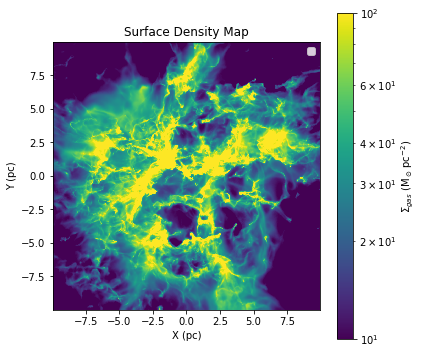

In [42]:
fig, ax = plt.subplots(figsize=(6,6))
p = ax.pcolormesh(50 - X, 50 - Y,Surface_Den ,norm=colors.LogNorm(vmin=1e1,vmax=1e2))
#ax.scatter(50 - YSO_X, 50 - YSO_Y, marker = '*', label = "YSO", alpha = 1, linewidths=1, zorder=2, edgecolors='brown', facecolor="None")
#p = ax.contour(50 - X, 50 - Y, Surface_Den, levels= 200, norm='log', cmap="viridis", alpha = 0.5, zorder=1)

fig.colorbar(p,label=r"$\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$")
#fig.colorbar(p,label=r"Temperature ($K$)")

ax.set_aspect('equal')
ax.set_xlabel("X (pc)")
#ax.set_xlim(-5,5)
#ax.set_ylim(-4,6)
ax.set_ylabel("Y (pc)")
ax.legend()
plt.title("Surface Density Map")
plt.show()

In [19]:
rows, cols = Surface_Den.shape
output_array = Surface_Den.copy()

# Loop over each pixel (excluding the boundary to prevent index out-of-bounds)
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        # Check if the current pixel value exceeds 1e4
        if Surface_Den[i, j] > 1e4:
            # Extract the 4 nearest neighbors (top, bottom, left, right)
            neighbors = [
                Surface_Den[i - 1, j],  # Top
                Surface_Den[i + 1, j],  # Bottom
                Surface_Den[i, j - 1],  # Left
                Surface_Den[i, j + 1]   # Right
            ]
            # Replace the current pixel with the median of the 4 nearest neighbors
            output_array[i, j] = np.median(neighbors)


In [14]:
kappa_dust=0.0092 * u.g / u.cm**2

rows, cols = new_TauFit500.shape
output_array2 = new_TauFit500.copy()
output_array2 

# Loop over each pixel (excluding the boundary to prevent index out-of-bounds)
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        # Check if the current pixel value exceeds 1e4
        if TauFit500[i, j] > 1e4:
            # Extract the 4 nearest neighbors (top, bottom, left, right)
            neighbors = [
                new_TauFit500 [i - 1, j],  # Top
                new_TauFit500 [i + 1, j],  # Bottom
                new_TauFit500 [i, j - 1],  # Left
                new_TauFit500 [i, j + 1]   # Right
            ]
            # Replace the current pixel with the median of the 4 nearest neighbors
            output_array2[i, j] = np.median(neighbors)

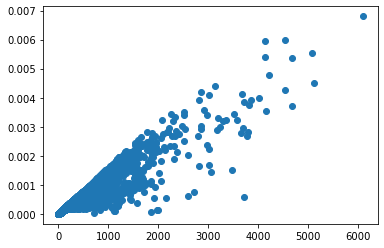

In [15]:
new_den = output_array.flatten()
new_tau_den = (output_array2.flatten()) * u.Msun / u.pc**2
new_tau_den / (kappa_dust.to(u.Msun / u.pc**2))
plt.scatter(new_den, new_tau_den)

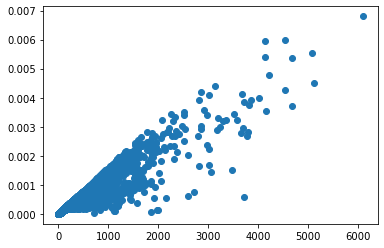

In [16]:
plt.scatter(Surface_Den, TauFit500)

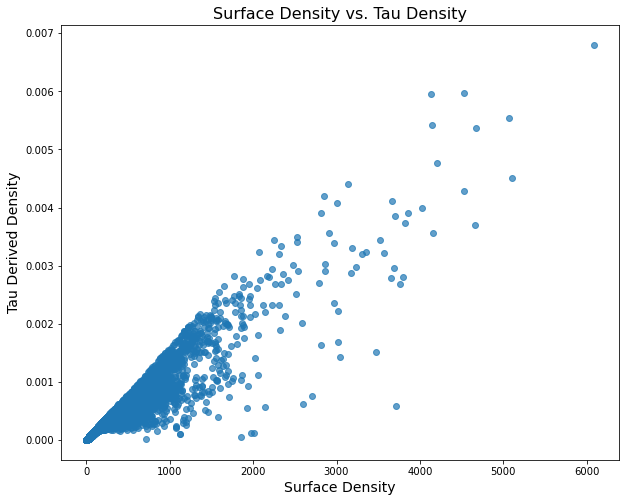

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

# Assuming Surface_Den, new_TauFit500, TauFit500, and kappa_dust are already defined.
# For example, if you need to define kappa_dust:
# kappa_dust = 0.0092 * u.g / u.cm**2

# Use the original arrays without threshold limits:
output_array = Surface_Den.copy()       # For the surface density
output_array2 = new_TauFit500.copy()      # For the tau data

# Flatten the arrays:
new_den = output_array.flatten()
new_tau_den = (output_array2.flatten()) * u.Msun / u.pc**2

# Optionally, compute the tau-derived density in units of surface density using kappa_dust:
tau_density_ratio = new_tau_den / (kappa_dust.to(u.Msun / u.pc**2))

# Create the scatter plot:
plt.figure(figsize=(10, 8))
plt.scatter(new_den, new_tau_den, alpha=0.7)
plt.xlabel("Surface Density", fontsize=14)
plt.ylabel("Tau Derived Density", fontsize=14)
plt.title("Surface Density vs. Tau Density", fontsize=16)
plt.show()
